The amount of information there is in a discrete event $x$ can be calculated using probability of the discrete event $x$ as follows:  
$h(x) = -log_2(p(x))$

In [3]:
#calculate the information of coint flips
from math import log2
#probability of flipping a head event
p = 0.5
#calculate information for event
h = -log2(p)
print('p(x)=%.3f, information: %.3f bits' % (p, h))


p(x)=0.500, information: 1.000 bits


if the coin was flipped n times, then the information for this sequence of flips wound n bits

Another example for the information in a single roll of a fair six-sided dice.

In [4]:
#probability of the event
p = 1.0 / 6.0
#calculate information for event
h = -log2(p)
print('p(x)=%.3f, information: %.3f bits' % (p, h))

p(x)=0.167, information: 2.585 bits


Other logarithms can be used instead of the base-2. For example, it is also common to use the natural logarithm that use base-e in calculating the information, in which case the units are referred to as "*nats*"

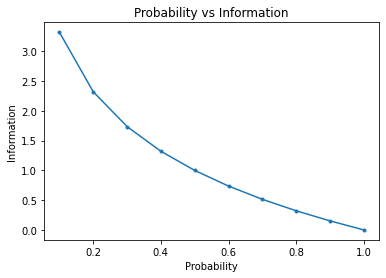

In [6]:
# the information for probabilities between 0% to 100%
from matplotlib import pyplot
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
pyplot.plot(probs, info, marker='.')
pyplot.title('Probability vs Information')
pyplot.xlabel('Probability')
pyplot.ylabel('Information')
pyplot.show()

### Calculate the Entropy for a Random Variable

Calculating the information for a random variable is called "*information entropy*". It is related to the idea of entropy from physics by analogy, in that both are concerned with uncertainty

The intuition for entropy is that it is the average number of bits required to represent or transmit an event drawn from the probability distribution for the random variable

Entropy can be calculated for a random variable $X$ with $k$ in $K$ discrete states as follows:  

$H(X) = -\displaystyle\sum_{k}^{K}p(k) * log_2(p(k))$

We can consider a roll of a fair dice and calculate the entropy for the variable. Each outcome has the same probability of $\frac{1}{6}$, therefore it is a uniform probability distribution. We therefore would expect the average information to the the same information for a single event calculated in previous section

In [9]:
# the number of events (K)
n = 6
# probability of one event
p = 1.0 / n
#calculate the entropy
entropy = -sum([p * log2(p) for _ in range(n)])
print('entropy: %.3f bits' % entropy)

entropy: 2.585 bits


In [11]:
#calculate entropy using scipy
from scipy.stats import entropy
#discrete probabilities
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
#calculate entropy
e = entropy(p, base=2)
print('entropy: %.3f bits' % e)

entropy: 2.585 bits


In the case where one event dominates, such as a skewed probability distribution, then there is less suprise and the distribution will have a lower entropy. In the case where no event dominates another, such as equal or approximately equal probability distribution, the we would expect larger or maximum entropy.

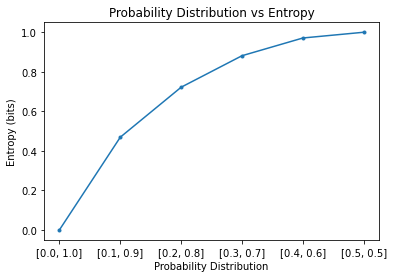

In [13]:
#calculate the entropy
def entropy(events, ets=1e-15):
    return -sum([p * log2(p + ets) for p in events])

probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
#create probability distribution of 2 events
dists = [[p, 1.0 - p] for p in probs]
#calculate the entropy for each distribution
ents = [entropy(d) for d in dists]
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

### Summary
- Information theory is concerned with data compression and transmission and builds upon probability and supports machine learning.
- Information provides a way to quantify the amount of surprise for an event measured in bits.
- Entropy provides a measure of the average amount of information needed to represent an event drawn from a probability distribution for a random variable.